# Packages

In [53]:
# Data Manipulation
import pandas as pd
import numpy as np

# Modeling
from mlxtend.frequent_patterns import apriori, association_rules 

# Visualisation
from plotnine import *

# Data Preparation

## Data Import

open the file and import all transactions

In [27]:
retail = pd.read_excel("./data/OnlineRetail.xlsx")

In [28]:
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


Columns of our dataset

In [29]:
retail.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

## Data Cleaning

In [31]:
# stripping extra spaces in the description
retail['Description'] = retail['Description'].str.strip()

In [35]:
retail.shape

(541909, 8)

In [37]:
# Dropping the rows without any invoice number 
retail.dropna(subset =['InvoiceNo'], axis = 0, inplace = True) 
retail['InvoiceNo'] = retail['InvoiceNo'].astype('str') 
retail.shape

(541909, 8)

# Modeling

Create a basket (sparse matrix with transactions x items)

In [47]:
basket_germany = (retail[retail['Country'] == 'Germany']
 .groupby(['InvoiceNo', 'Description'])['Quantity']
 .sum()
 .unstack()
 .reset_index()
 .fillna(0)
 .set_index('InvoiceNo')
)

In [46]:
basket_germany

Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE SKULLS,...,YULETIDE IMAGES GIFT WRAP SET,ZINC HEART T-LIGHT HOLDER,ZINC STAR T-LIGHT HOLDER,ZINC BOX SIGN HOME,ZINC FOLKART SLEIGH BELLS,ZINC HEART LATTICE T-LIGHT HOLDER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC WILLIE WINKIE CANDLE STICK
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536527,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536840,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536861,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536967,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536983,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537197,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537198,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537201,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537212,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## One-Hot Encoding

In [48]:
def hot_encode(x): 
    if(x<= 0): 
        return 0
    if(x>= 1): 
        return 1

*applymap()* applies a function elementwise to every element of a dataframe.

In [50]:
basket_germany = basket_germany.applymap(hot_encode)
basket_germany

Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE SKULLS,...,YULETIDE IMAGES GIFT WRAP SET,ZINC HEART T-LIGHT HOLDER,ZINC STAR T-LIGHT HOLDER,ZINC BOX SIGN HOME,ZINC FOLKART SLEIGH BELLS,ZINC HEART LATTICE T-LIGHT HOLDER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC WILLIE WINKIE CANDLE STICK
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536527,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536840,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536861,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536967,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536983,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537197,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537198,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537201,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537212,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [72]:
freq_items = pd.DataFrame(apriori(basket_germany, min_support=0.05, use_colnames=True)).sort_values('support', ascending=False)

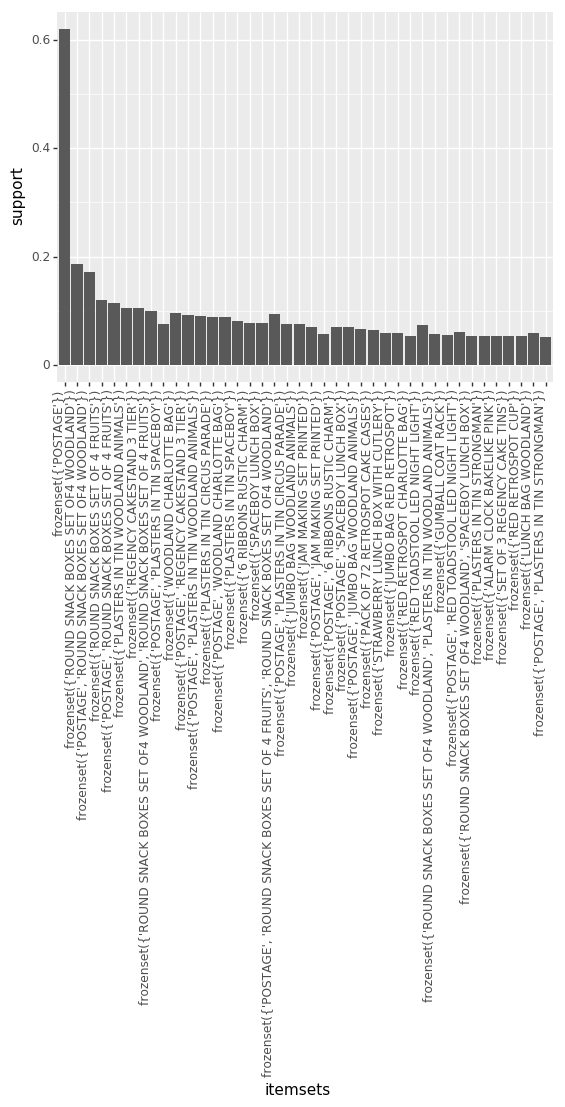

<ggplot: (-9223371855255592602)>

In [74]:
(ggplot(data=freq_items[:40], mapping=aes(x='itemsets', y='support')) +
 geom_col() +
 theme(axis_text_x=element_text(rotation=90, hjust=1))
)

In [76]:
rules = association_rules(freq_items, metric='lift', min_threshold=1)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(POSTAGE),(ROUND SNACK BOXES SET OF4 WOODLAND),0.620232,0.185738,0.170813,0.275401,1.482740,0.055612,1.123742
1,(ROUND SNACK BOXES SET OF4 WOODLAND),(POSTAGE),0.185738,0.620232,0.170813,0.919643,1.482740,0.055612,4.726000
2,(POSTAGE),(ROUND SNACK BOXES SET OF 4 FRUITS),0.620232,0.119403,0.114428,0.184492,1.545120,0.040370,1.079814
3,(ROUND SNACK BOXES SET OF 4 FRUITS),(POSTAGE),0.119403,0.620232,0.114428,0.958333,1.545120,0.040370,9.114428
4,(ROUND SNACK BOXES SET OF4 WOODLAND),(ROUND SNACK BOXES SET OF 4 FRUITS),0.185738,0.119403,0.099502,0.535714,4.486607,0.077325,1.896670
5,(ROUND SNACK BOXES SET OF 4 FRUITS),(ROUND SNACK BOXES SET OF4 WOODLAND),0.119403,0.185738,0.099502,0.833333,4.486607,0.077325,4.885572
6,"(POSTAGE, ROUND SNACK BOXES SET OF 4 FRUITS)",(ROUND SNACK BOXES SET OF4 WOODLAND),0.114428,0.185738,0.094527,0.826087,4.447593,0.073274,4.682007
7,"(POSTAGE, ROUND SNACK BOXES SET OF4 WOODLAND)",(ROUND SNACK BOXES SET OF 4 FRUITS),0.170813,0.119403,0.094527,0.553398,4.634709,0.074132,1.971772
8,"(ROUND SNACK BOXES SET OF4 WOODLAND, ROUND SNA...",(POSTAGE),0.099502,0.620232,0.094527,0.950000,1.531684,0.032813,7.595357
9,(POSTAGE),"(ROUND SNACK BOXES SET OF4 WOODLAND, ROUND SNA...",0.620232,0.099502,0.094527,0.152406,1.531684,0.032813,1.062417


Task: find all itemsets that have 

- at least two items,

- a support of 10 %

In [77]:
freq_items['length'] = freq_items['itemsets'].apply(lambda x: len(x))

In [84]:
freq_items[(freq_items['length'] >= 2) &
          (freq_items['support'] >= 0.1)
          ]

,support,itemsets,length
37,0.170813,"(POSTAGE, ROUND SNACK BOXES SET OF4 WOODLAND)",2
36,0.114428,"(POSTAGE, ROUND SNACK BOXES SET OF 4 FRUITS)",2
